### Locally running commands from sci-kit learn mooc online.(https://github.com/INRIA/scikit-learn-mooc/)
#### Module 1: The predictive modeling pipeline

SampurnaM, 12.51pm, 15-11-24

### The dataset: OpenML 1994 US census data (http://www.openml.org/d/1590)



In [1]:
!wget https://www.openml.org/data/download/1595261/phpMawTba

--2024-11-15 12:56:07--  https://www.openml.org/data/download/1595261/phpMawTba
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5962724 (5.7M) [text/plain]
Saving to: ‘phpMawTba’

phpMawTba           100%[===================>]   5.69M  3.11MB/s    in 1.8s    

2024-11-15 12:56:09 (3.11 MB/s) - ‘phpMawTba’ saved [5962724/5962724]



In [52]:
#!cat phpMawTba

#### This data is in ARFF format


we will use scipy to load this data format and then load it into pandas
!pip install scipy /
Requirement already satisfied: scipy in /home/sampurna/anaconda3/envs/prolif/lib/python3.10/site-packages (1.10.0)

In [1]:
import scipy
import pandas as pd
from scipy.io import arff #https://www.kaggle.com/code/gauravduttakiit/arff-to-csv


In [2]:
adult_census_data,metadata = arff.loadarff('phpMawTba')

In [10]:
adult_census_data

array([(25., b'Private', 226802., b'11th',  7., b'Never-married', b'Machine-op-inspct', b'Own-child', b'Black', b'Male',     0., 0., 40., b'United-States', b'<=50K'),
       (38., b'Private',  89814., b'HS-grad',  9., b'Married-civ-spouse', b'Farming-fishing', b'Husband', b'White', b'Male',     0., 0., 50., b'United-States', b'<=50K'),
       (28., b'Local-gov', 336951., b'Assoc-acdm', 12., b'Married-civ-spouse', b'Protective-serv', b'Husband', b'White', b'Male',     0., 0., 40., b'United-States', b'>50K'),
       ...,
       (58., b'Private', 151910., b'HS-grad',  9., b'Widowed', b'Adm-clerical', b'Unmarried', b'White', b'Female',     0., 0., 40., b'United-States', b'<=50K'),
       (22., b'Private', 201490., b'HS-grad',  9., b'Never-married', b'Adm-clerical', b'Own-child', b'White', b'Male',     0., 0., 20., b'United-States', b'<=50K'),
       (52., b'Self-emp-inc', 287927., b'HS-grad',  9., b'Married-civ-spouse', b'Exec-managerial', b'Wife', b'White', b'Female', 15024., 0., 40., b'U

In [3]:
adult_census = pd.DataFrame(adult_census_data) #https://stackoverflow.com/questions/75889576/how-to-load-from-arff-file-data-set-to-python-using-pandas

In [4]:
adult_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,b'Private',226802.0,b'11th',7.0,b'Never-married',b'Machine-op-inspct',b'Own-child',b'Black',b'Male',0.0,0.0,40.0,b'United-States',b'<=50K'
1,38.0,b'Private',89814.0,b'HS-grad',9.0,b'Married-civ-spouse',b'Farming-fishing',b'Husband',b'White',b'Male',0.0,0.0,50.0,b'United-States',b'<=50K'
2,28.0,b'Local-gov',336951.0,b'Assoc-acdm',12.0,b'Married-civ-spouse',b'Protective-serv',b'Husband',b'White',b'Male',0.0,0.0,40.0,b'United-States',b'>50K'
3,44.0,b'Private',160323.0,b'Some-college',10.0,b'Married-civ-spouse',b'Machine-op-inspct',b'Husband',b'Black',b'Male',7688.0,0.0,40.0,b'United-States',b'>50K'
4,18.0,b'?',103497.0,b'Some-college',10.0,b'Never-married',b'?',b'Own-child',b'White',b'Female',0.0,0.0,30.0,b'United-States',b'<=50K'


In [5]:
## counting the number of values in each class

In [6]:
target_column = "class"
adult_census[target_column].value_counts()

class
b'<=50K'    37155
b'>50K'     11687
Name: count, dtype: int64

In [7]:
## Now we divide the columns into numerical and categorical

In [8]:
numerical_columns = ["age","education-num","capital-gain","capital-loss","hours-per-week"]

In [9]:
categorical_columns = ["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]

In [10]:
all_columns = numerical_columns+categorical_columns+[target_column]

In [11]:
all_columns

['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class']

In [12]:
adult_census[all_columns] #'the dataframe subsetted according to numerical first and categorical after

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,25.0,7.0,0.0,0.0,40.0,b'Private',b'11th',b'Never-married',b'Machine-op-inspct',b'Own-child',b'Black',b'Male',b'United-States',b'<=50K'
1,38.0,9.0,0.0,0.0,50.0,b'Private',b'HS-grad',b'Married-civ-spouse',b'Farming-fishing',b'Husband',b'White',b'Male',b'United-States',b'<=50K'
2,28.0,12.0,0.0,0.0,40.0,b'Local-gov',b'Assoc-acdm',b'Married-civ-spouse',b'Protective-serv',b'Husband',b'White',b'Male',b'United-States',b'>50K'
3,44.0,10.0,7688.0,0.0,40.0,b'Private',b'Some-college',b'Married-civ-spouse',b'Machine-op-inspct',b'Husband',b'Black',b'Male',b'United-States',b'>50K'
4,18.0,10.0,0.0,0.0,30.0,b'?',b'Some-college',b'Never-married',b'?',b'Own-child',b'White',b'Female',b'United-States',b'<=50K'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,12.0,0.0,0.0,38.0,b'Private',b'Assoc-acdm',b'Married-civ-spouse',b'Tech-support',b'Wife',b'White',b'Female',b'United-States',b'<=50K'
48838,40.0,9.0,0.0,0.0,40.0,b'Private',b'HS-grad',b'Married-civ-spouse',b'Machine-op-inspct',b'Husband',b'White',b'Male',b'United-States',b'>50K'
48839,58.0,9.0,0.0,0.0,40.0,b'Private',b'HS-grad',b'Widowed',b'Adm-clerical',b'Unmarried',b'White',b'Female',b'United-States',b'<=50K'
48840,22.0,9.0,0.0,0.0,20.0,b'Private',b'HS-grad',b'Never-married',b'Adm-clerical',b'Own-child',b'White',b'Male',b'United-States',b'<=50K'


In [34]:
adult_census = adult_census[all_columns]

In [13]:
adult_census.shape #48842 samples, 13 features

(48842, 15)

### Visual inspection of the data

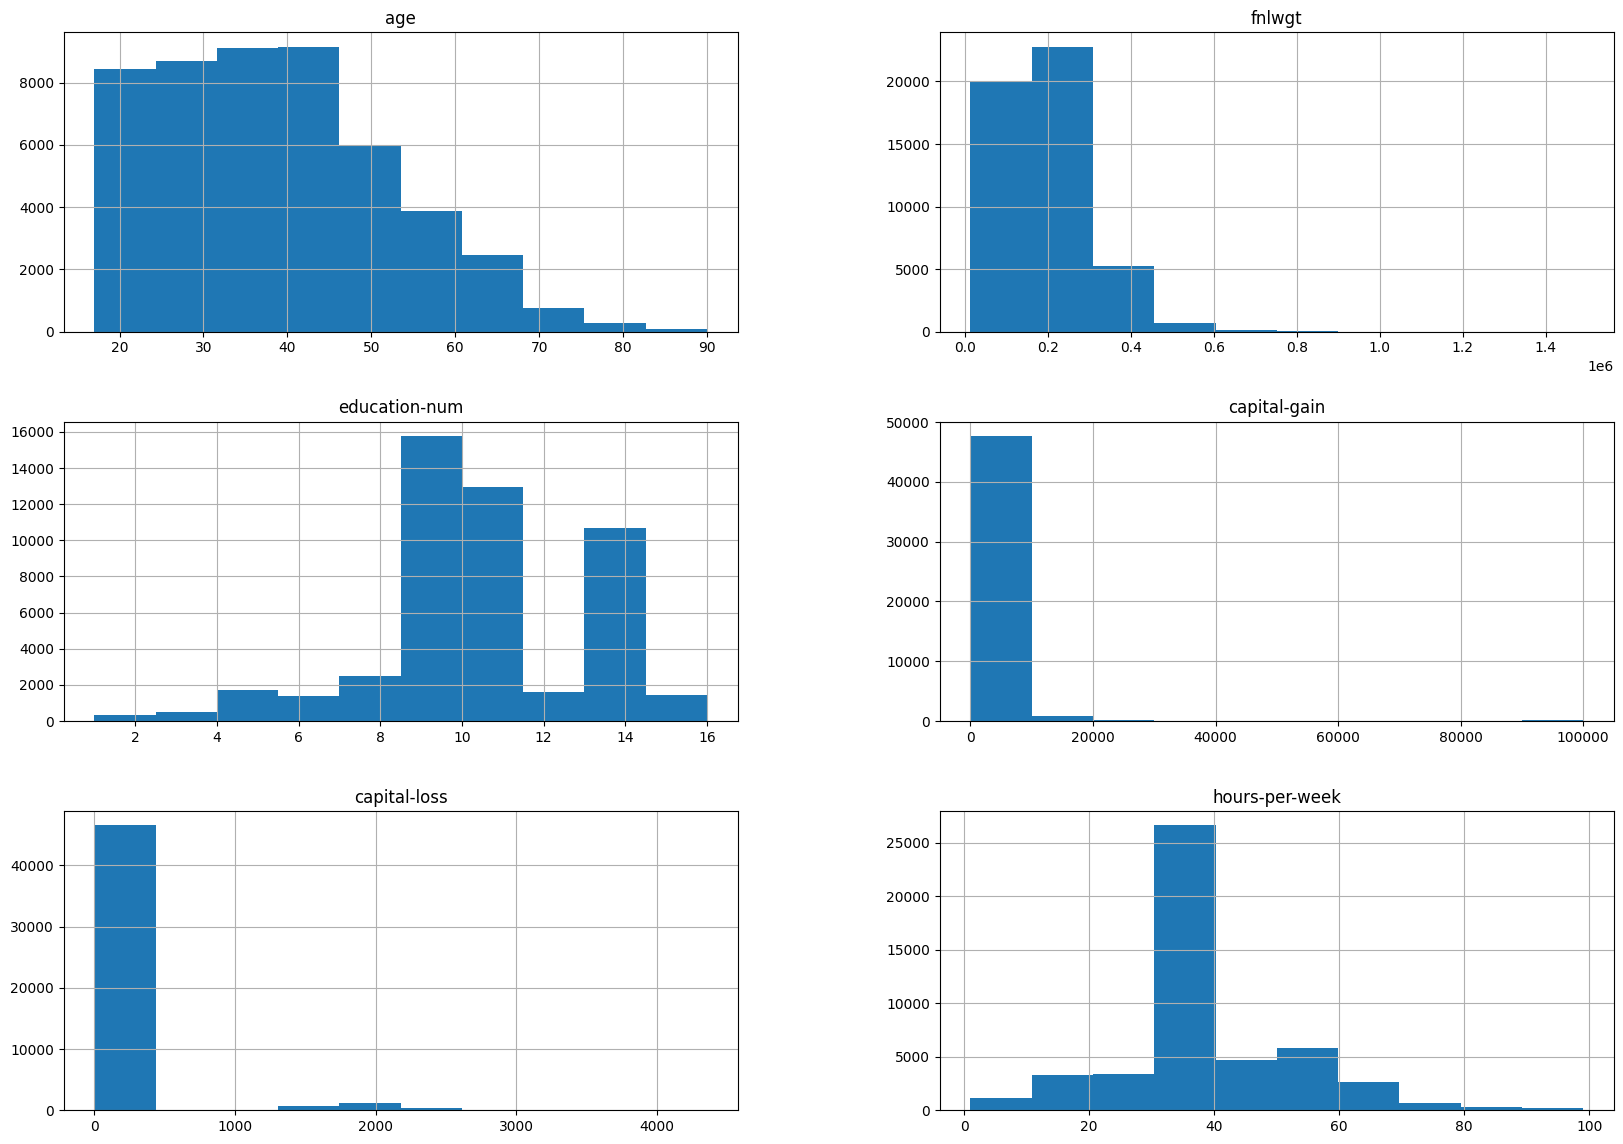

In [14]:
_ = adult_census.hist(figsize = (20,14))

In [ ]:
#looking at categorical data

In [15]:
adult_census["sex"].value_counts()

sex
b'Male'      32650
b'Female'    16192
Name: count, dtype: int64

In [16]:
adult_census["education"].value_counts()

education
b'HS-grad'         15784
b'Some-college'    10878
b'Bachelors'        8025
b'Masters'          2657
b'Assoc-voc'        2061
b'11th'             1812
b'Assoc-acdm'       1601
b'10th'             1389
b'7th-8th'           955
b'Prof-school'       834
b'9th'               756
b'12th'              657
b'Doctorate'         594
b'5th-6th'           509
b'1st-4th'           247
b'Preschool'          83
Name: count, dtype: int64

In [17]:
##looking at th e relationship between education and education -num

In [19]:
pd.crosstab(
    index=adult_census["education"],columns = adult_census["education-num"]
)

education-num,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
education,,,,,,,,,,,,,,,,
b'10th',0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
b'11th',0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
b'12th',0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
b'1st-4th',0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
b'5th-6th',0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
b'7th-8th',0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
b'9th',0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
b'Assoc-acdm',0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
b'Assoc-voc',0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


Therefore, preschool = 1 and so on. i.e.same data in both columns, i.e. data redundancy

In [20]:
#Making pairplots to visualize the relationship between target and variables

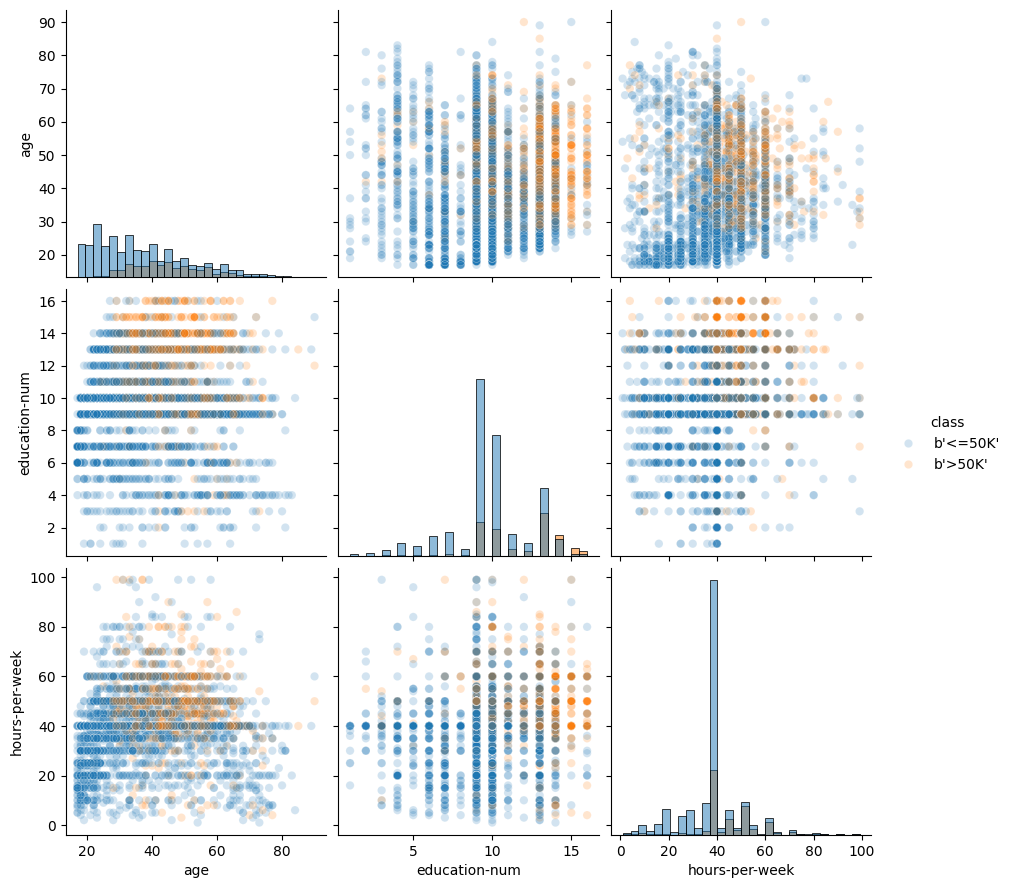

In [21]:
import seaborn as sns
#subsetting the data for readability
n_samples_to_plot = 5000
columns = ["age","education-num", "hours-per-week"]
_ = sns.pairplot(
    data = adult_census[:n_samples_to_plot],vars = columns, hue = target_column,
    plot_kws={"alpha":0.2},
    height =3,
    diag_kind = "hist",
    diag_kws ={"bins":30}
)

In [22]:
#creating decision rules by hand

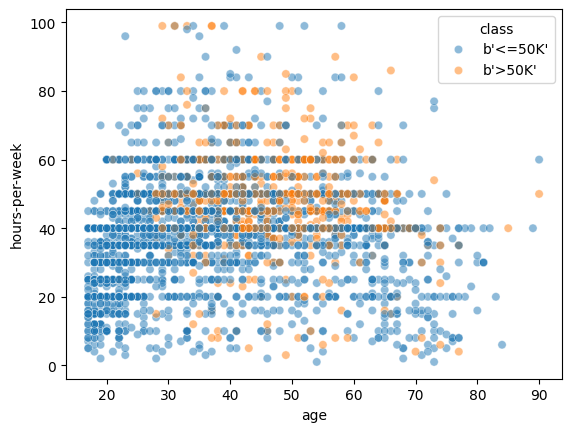

In [23]:
_ = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

In [24]:
## manually drawing lines

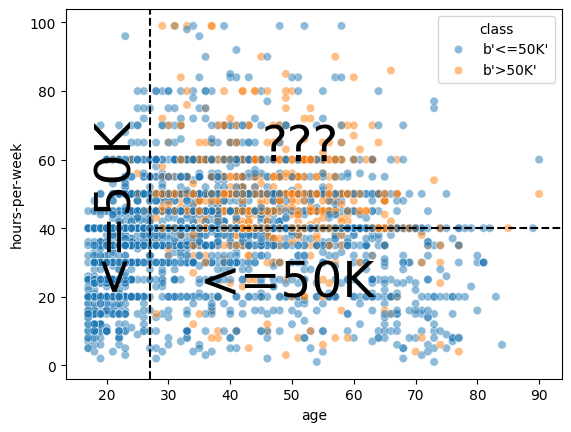

In [26]:
import matplotlib.pyplot as plt
ax = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--"
)

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

In [34]:
## Exercise M1.01
#On penguins dataset: predicting penguin species based on two measurements: culmen length and culmen 
#data downloaded from official github : https://github.com/INRIA/scikit-learn-mooc/blob/main/datasets/penguins_classification.csv

In [35]:
penguins_classification = pd.read_csv("penguins_classification.csv")

Show a few samples of the data.

How many features are numerical? How many features are categorical?

In [37]:
penguins_classification.head()

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie


Therefore, there are two numerical features

In [ ]:
What are the different penguins species available in the dataset and how many samples of each species are there?

In [39]:
penguins_classification["Species"].value_counts()

Species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

Plot histograms for the numerical features

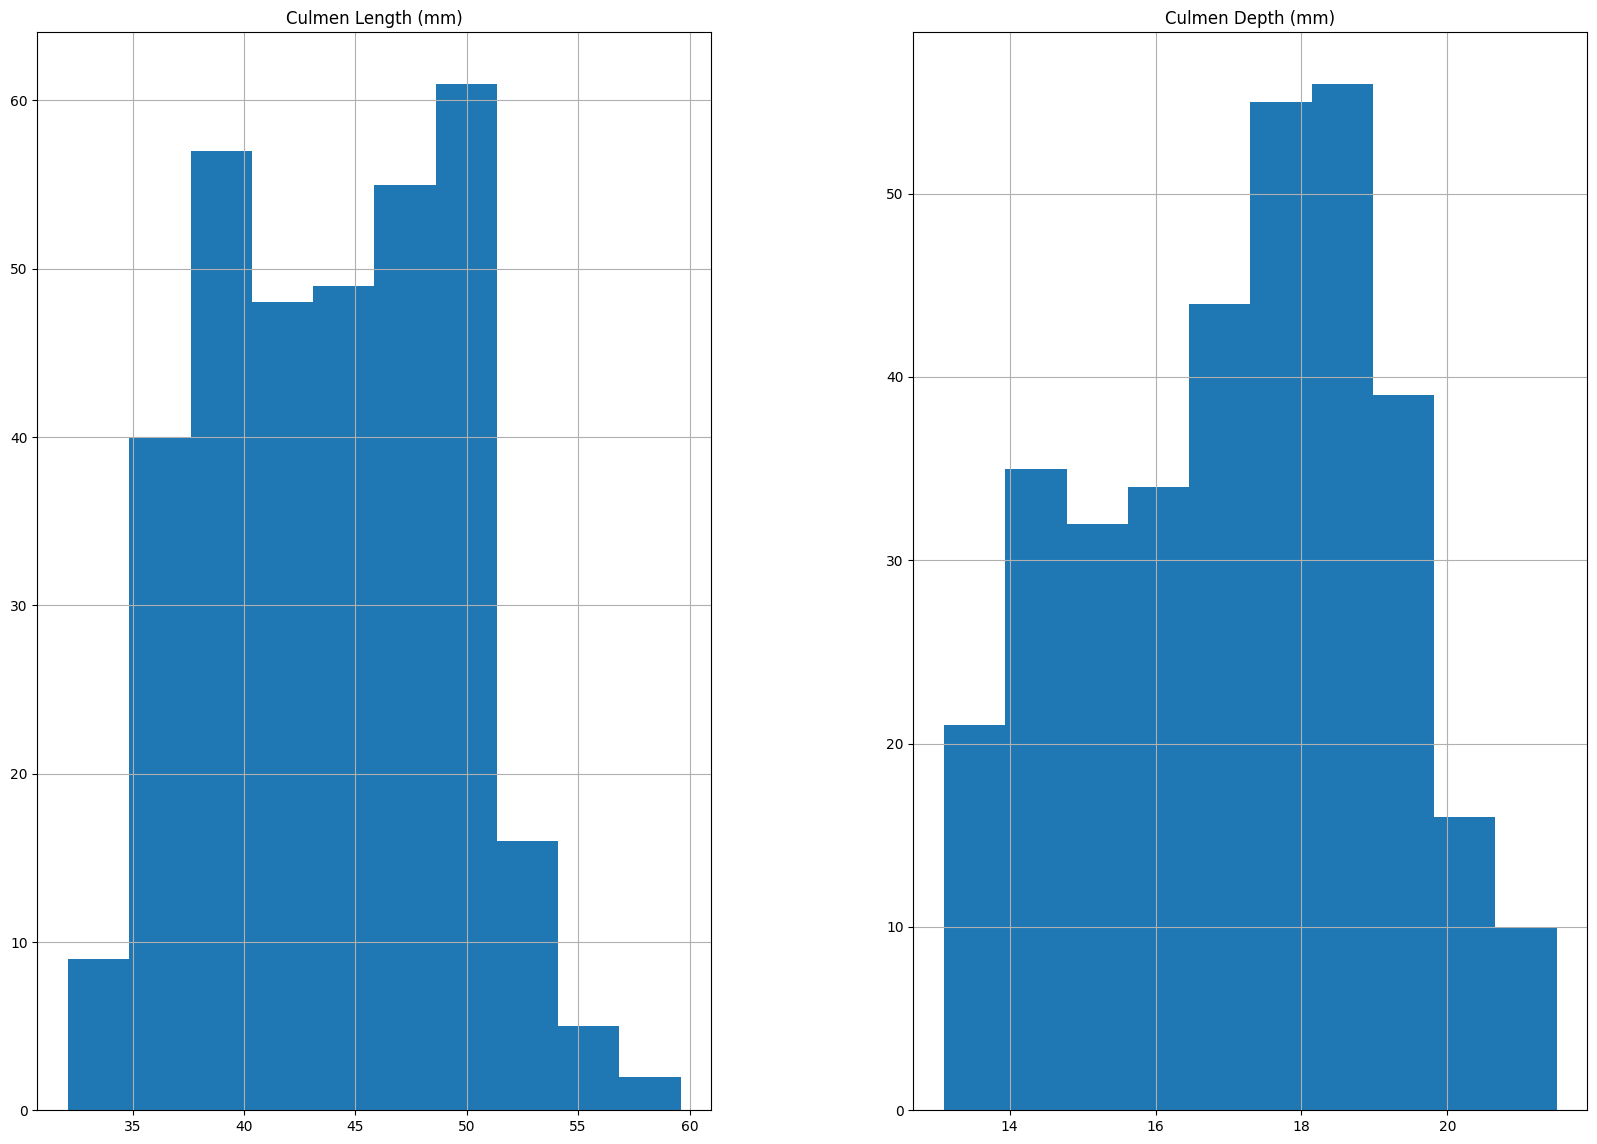

In [40]:
_ = penguins_classification.hist(figsize = (20,14))

In [42]:
penguins_classification.shape #no subsetting needed

(342, 3)

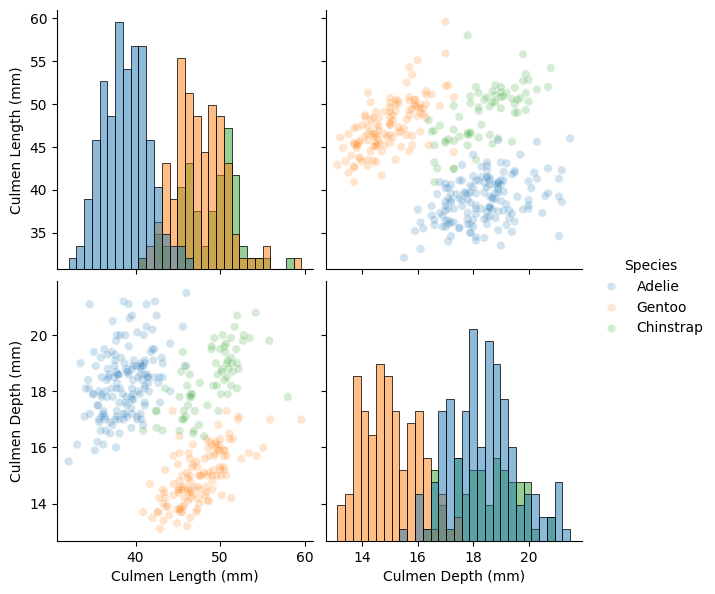

In [43]:


columns = ["Culmen Length (mm)",	"Culmen Depth (mm)"]

_ = sns.pairplot(
    data = penguins_classification,vars = columns, hue = "Species",
    plot_kws={"alpha":0.2},
    height =3,
    diag_kind = "hist",
    diag_kws ={"bins":30}
)

Looking at these distributions, how hard do you think it would be to classify the penguins only using "culmen depth" and "culmen length"?

Answer: Adelie and Gentoo are very clearly distinguishable using only two features, however there are some overlaps with Gentoo for each species so decision rule is difficult.

In [46]:
## First sci-kit learn model!

This will be on the adult census data, and the numerical columns

In [55]:
adult_census_numerical = adult_census[numerical_columns]

In [56]:
adult_census_numerical.head() #this is the data

,age,education-num,capital-gain,capital-loss,hours-per-week
0,25.0,7.0,0.0,0.0,40.0
1,38.0,9.0,0.0,0.0,50.0
2,28.0,12.0,0.0,0.0,40.0
3,44.0,10.0,7688.0,0.0,40.0
4,18.0,10.0,0.0,0.0,30.0


In [58]:
target = adult_census[target_column]

In [59]:
target.head() #this is the class we are predicting, i.e the target 

0    b'<=50K'
1    b'<=50K'
2     b'>50K'
3     b'>50K'
4    b'<=50K'
Name: class, dtype: object

In [70]:
#decoding the target to move from bytes to string
#https://www.geeksforgeeks.org/python-pandas-series-str-decode/
target = target.str.decode(encoding = 'UTF-8') 

In [71]:
target.head() 

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: class, dtype: object

In [72]:
## using K nearest neighbours classification model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
_ = model.fit(adult_census_numerical,target)

In [73]:
#making predictions using the dataset

In [74]:
target_predicted = model.predict(adult_census_numerical)

In [75]:
#let's see first 5 predicted data and compare it with actual data

In [76]:
target_predicted[:5]

array(['<=50K', '<=50K', '<=50K', '>50K', '<=50K'], dtype=object)

In [77]:
target[:5]

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: class, dtype: object

In [78]:
#so, there is error predicting for the third sample

In [79]:
#to see how the average success rate is
(target == target_predicted).mean()

0.850538470988084

### This was the result of the model on the whole dataset with no train/test split

Instead of manually computing scores, we can use the built-in .score function

In [81]:
accuracy = model.score(adult_census_numerical,target)

In [82]:
accuracy

0.850538470988084

## Exercise M1.02

In [ ]:
#dataset: dult-census-numeric.csv
#downloaded from: https://github.com/INRIA/scikit-learn-mooc/blob/main/datasets/adult-census-numeric.csv



In [94]:
#loading the csv data into dataframes
adult_census = pd.read_csv("adult-census-numeric.csv")
data = adult_census.drop(columns="class")
target = adult_census["class"]

In [96]:
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40


In [97]:
target.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: class, dtype: object

What is the default value of the n_neighbors parameter?

In [84]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

Therefore, the default value of n_neighbors is 5

Create a KNeighborsClassifier model with n_neighbors=50

In [98]:
model_n50 = KNeighborsClassifier(n_neighbors=50)

In [100]:
_ = model_n50.fit(data,target)

Use your model to make predictions on the first 10 data points inside the data. Do they match the actual target values?

In [101]:
target_first_10 = model_n50.predict(data[:10])

In [91]:
target_first_10

array(['<=50K', '<=50K', '<=50K', '>50K', '<=50K', '<=50K', '<=50K',
       '>50K', '<=50K', '<=50K'], dtype=object)

In [92]:
target[:10]

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
5    <=50K
6    <=50K
7     >50K
8    <=50K
9    <=50K
Name: class, dtype: object

Therefore, number of correct prediction is :

In [93]:
(target[:10] == target_first_10).sum()/10

0.9

In [ ]:
# accuracy on the training data:

In [103]:
accuracy = model_n50.score(data,target)

In [104]:
accuracy

0.8290379545978042

Now load the test data from "../datasets/adult-census-numeric-test.csv" and compute the accuracy on the test data.
Dataset downloaded from https://github.com/INRIA/scikit-learn-mooc/blob/main/datasets/adult-census-numeric-test.csv

In [105]:
adult_census_t = pd.read_csv("adult-census-numeric-test.csv")
data_t = adult_census_t.drop(columns="class")
target_t = adult_census_t["class"]

In [106]:
target_test = model_n50.predict(data_t)

In [107]:
accuracy_t = model_n50.score(data_t,target_t)

In [108]:
accuracy_t

0.8177909714402702